# Example 4 - Calculate PDFs from PSDs
In this example, we will use the pdf_aggregator.py script to calculate PDFs on-the-fly.  The calculate_pdfs method in the pdf_aggregator will look for existing PSDs, calculate the PDFs, and then return the PDF values in a dataframe.  It also returns dataframes of the modes, minimums, and maximums. 


This example is slightly more complicated because it is tying into the ISPAQ code directly. That means that we need to import multiple functions from various ISPAQ scripts, and we need the proper arguments available for each of those. 

First we import the simple ones:

In [1]:
import sys
import os
import logging
import pandas as pd
from obspy import UTCDateTime

Now we move onto the ISPAQ-specific ones. Because of the directory structure and where this example lives, we need to add the main ispaq directory to our path. Then we will be able to import the ISPAQ modules. 

In [2]:
path_parent = os.path.dirname(os.getcwd())
sys.path.insert(1, f'{path_parent}/ispaq/')


import concierge
from user_request import UserRequest
import PDF_aggregator

/Users/laura/opt/miniconda3/envs/ispaq38j2/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


With the modules imported, we now need to set up some variables that will be required to run the ISPAQ code. This includes a logger and an arguments class that contains the fields from the preference file.

In [3]:
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s', datefmt='%Y-%m-%d %H:%M:%S')

class args:
    db_name = 'ispaq.db'
    starttime = UTCDateTime('2020-10-01')
    endtime = UTCDateTime('2021-10-15')
    metrics = 'pdf'
    stations = 'IU.ANMO.00.BH1'
    preferences_file = f'{path_parent}/preference_files/default.txt'
    station_url = 'IRIS'
    dataselect_url = 'IRIS'
    event_url = 'IRIS'
    resp_dir = ''
    output = 'db'
    csv_dir = f'{path_parent}/csvs/'
    sncl_format = 'N.S.L.C.'
    sigfigs = 6
    pdf_type = 'plot'
    pdf_interval = 'aggregated'
    plot_include = ''
    pdf_dir = f'{path_parent}/pdfs/'
    psd_dir = f'{path_parent}/psds/'
    


Those will now be used to create a userRequest, which will then be used to create a concierge object. The concierge object will need to later be passed into the method that actually calculates the PDFs.

In [4]:
user_request = UserRequest(args, logger=logger)
concierge = concierge.Concierge(user_request, logger=logger)
print(concierge, logger)
print(concierge.logger)

<concierge.Concierge object at 0x7fb08123faf0> <Logger __main__ (DEBUG)>
<Logger __main__ (DEBUG)>


Now that we've handled that, we can calculate the PDFs. First, we move into the directory that contains the database, since that's where the ISPAQ code expects us to be. Then we call on the calculate_PDF method, which will return dataframes that contain: PDF values, modes, maximums, and minimums.

In [5]:
os.chdir(path_parent)
[pdfDF,modesDF, maxDF, minDF] = PDF_aggregator.calculate_PDF(pd.DataFrame(), args.stations, args.starttime, args.endtime, concierge)

With it in a dataframe, you can now do what you want with it! Manipulate it how you want.  

Below I call on the plot_PDF function to plot it up and save the figure to the pdf_dir specified above.

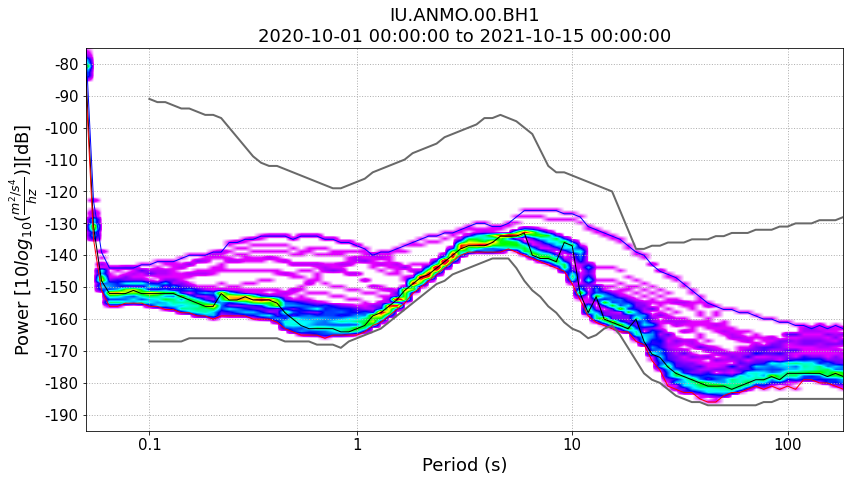

In [6]:
PDF_aggregator.plot_PDF(args.stations, args.starttime, args.endtime, pdfDF, modesDF, maxDF, minDF, concierge)